# Background

This analysis is related to the <i>Buckeye issue log</i> email storm happened on November 1st.  
This event was rather limited, at least compared to previous cases, and it was characterized by:

* 153 email
* 146 unique senders (some replied more than once)
* 142 unique reference indicators
* limited time frame: about 1 hour(*)

<i>(*) NOTE: This time frame is related to se sent time</i>

The original dataframe contains also names and reference indicators, these variables have been excluded on purpose from the anonymized dataframe used for this analysis.

Here under the first 5 observation of the dataframe:

![](./images/eda_head.png)

The dataframe consists of:

* 153 rows (one per email/observation)
* 6 columns/variables: Region, SentOn, ReceivedTime, LetterCount, Angriness and AngrinessBinned 

The <b>Region</b> has been derived from the senders' contact card where the location is mentioned.

The <b>Angriness</b> has been defined as the ratio between capital letters and the total amount of letters. It would be nice to extend/improve this definition using info from the email body such as the font size and color but unfortunately this info appears to be not easily accessible with the win32 client I used to parse the raw data.

The angriness continuous variable has been binnned in the following groups:
* Angriness below 0.3 --> <i>Not angry</i>
* Angriness between 0.3 and 0.8 --> <i>Moderately angry</i>
* Angriness above 0.8 --> <i>Angry</i>

# Exploratory analysis

An exploratory analysis tries to find patterns ans relationships in the data without performing any modeling or prediction.  
  
It is crucial in an EDA (Exploratory Data Analysis) to have in mind a question, here some:

1. Did the email storm create issues to the email servers?
2. Is there any relationship between the amount of emails received in time (or "email frequency") and the angriness in the replies?
3. It there any relationship between the number of typed letters and the angriness? 
4. Is the angriness affected  by the region?
5. Which region (Americas, EMEA and East) was more prone to "reply to all"?
  
Let's try to answer to those questions.

## Did the email storm create issues to the email servers?

<b>Figure 1</b> shows the evolution in time of the email count using the sent time as reference. For each email the travel time is also represented as an horizontal red segment. The longer the segment the longer the delay between the sent time and the received time. 

![](./images/eda_q1.png)
<b>Figure 1 - Emails count in time and travel time per email (represented as an horizontal red segment)</b>

The travel time appears to be not correlated to the sent time (it is strongly correlated to the received time, as expected). This can be seen in <b>Figure 2</b>:

![](./images/eda_q1_2.png)
<b>Figure 2 - Received or sent time in function of the travel time</b>

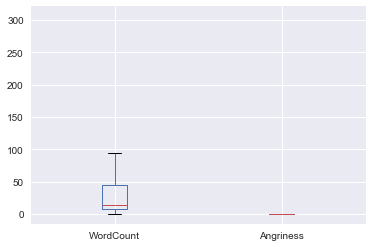

In [23]:
df.boxplot();

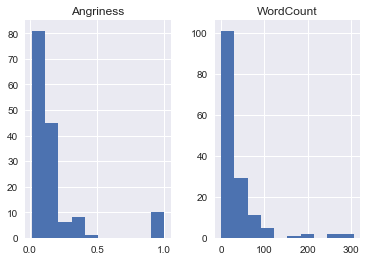

In [18]:
df.hist();

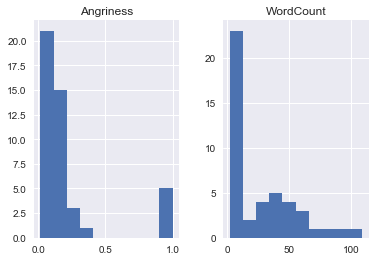

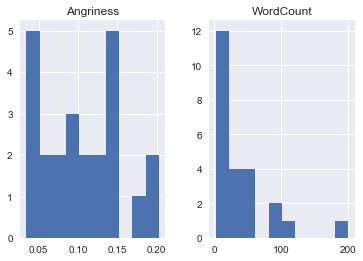

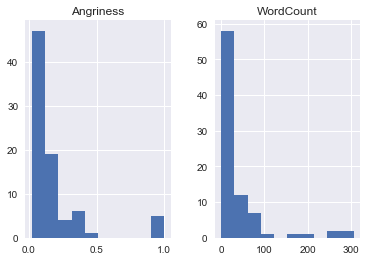

In [15]:
df.groupby('Region').hist();

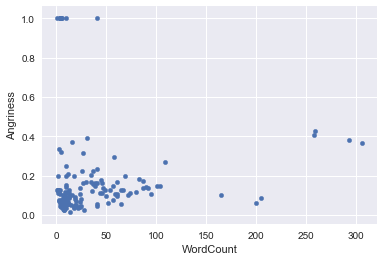

In [26]:
df.plot(kind="scatter", x="WordCount", y="Angriness",)

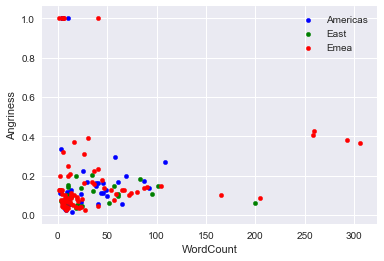

In [30]:
fig, ax = plt.subplots()
colors = {'Emea': 'r', 'Americas': 'b', 'East': 'g'}
grouped = df.groupby('Region')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x="WordCount", y="Angriness", label=key, color=colors[key])

---

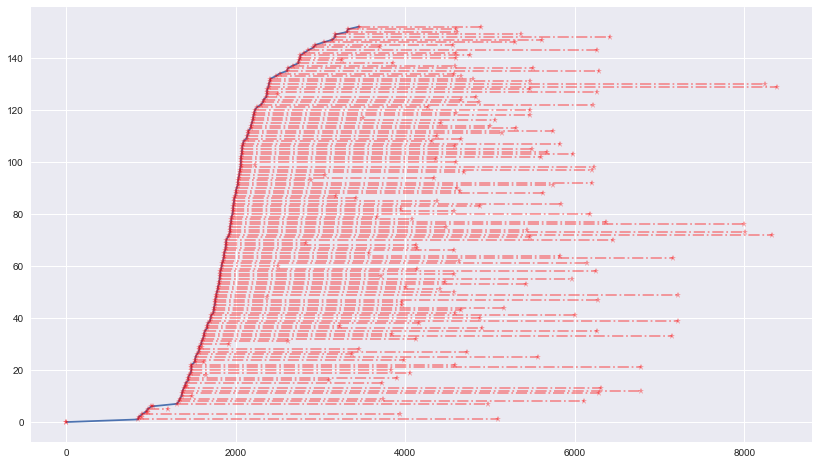

In [77]:
fig = plt.figure(figsize=(14, 8))
plt.plot(senton_timeline, df.index)
for idx in df.index:
    plt.plot((senton_timeline[idx], delay[idx]), 
             (df.index[idx], df.index[idx]), 'r-.*', alpha=0.4)

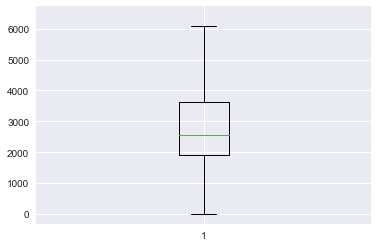

In [65]:
plt.boxplot(delay);